# Feature Analysis
This section is designed to extract features from the processed dataset for each grid id and analysis the potential feature columns for statistically significant features to predict emmissions.

# Extracting Feature Columns
This section aims to take the joined dataset and aggregate features for each grid id.

## Importing Requirements

In [1]:
# Import Packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns # for data vis
import matplotlib.pyplot as plt # for data vis

# Import Data
data = pd.read_csv('datasets\df_merged_RoadTrafficData_Emissions.csv', encoding='utf-8')

## Converting Discrete Columns into Machine Learning Features
There are a few steps to this process:
- Creating columns that count the number of distinct values for discrete columns
- Using the pandas dummies to create columns that indicate if a grid has a particular discrete value or not

### Getting unique counts

In [2]:
# Count of unique values for discrete columns
data_group_discrete = data.groupby(['rtd_grid_exactcut_id'])[['rtd_toid',
                                                              'rtd_location_exactcut',
                                                              'rtd_boroughname_exactcut',
                                                              'rtd_tlrn',
                                                              'rtd_motorwaynumber']].agg(pd.Series.nunique)
data_group_discrete.head()

,rtd_toid,rtd_location_exactcut,rtd_boroughname_exactcut,rtd_tlrn,rtd_motorwaynumber
rtd_grid_exactcut_id,,,,,
2.0,42,1,1,1,2
3.0,36,1,1,1,2
7.0,5,1,1,1,1
8.0,6,1,1,1,1
9.0,4,1,1,1,1


### Generating dummies

In [3]:
# Check whether or not a grid contains any discrete values
dummies_location_exactcut = pd.get_dummies(data['rtd_location_exactcut'], prefix='rtd_location_exactcut')
dummies_boroughname_exactcut = pd.get_dummies(data['rtd_boroughname_exactcut'], prefix='rtd_boroughname_exactcut')
dummies_tlrn = pd.get_dummies(data['rtd_tlrn'], prefix='rtd_tlrn')
dummies_motorwaynumber = pd.get_dummies(data['rtd_motorwaynumber'], prefix='rtd_motorwaynumber')

data_group_dummies = data['rtd_grid_exactcut_id']
data_group_dummies = pd.concat([data_group_dummies, dummies_location_exactcut, dummies_boroughname_exactcut, dummies_tlrn, dummies_motorwaynumber], axis=1)
data_group_dummies = data_group_dummies.groupby(['rtd_grid_exactcut_id']).agg('max')

data_group_dummies.head()


,rtd_location_exactcut_Central,rtd_location_exactcut_External,rtd_location_exactcut_Inner,rtd_location_exactcut_Outer,rtd_boroughname_exactcut_Barking and Dagenham,rtd_boroughname_exactcut_Barnet,rtd_boroughname_exactcut_Bexley,rtd_boroughname_exactcut_Brent,rtd_boroughname_exactcut_Bromley,rtd_boroughname_exactcut_Camden,...,rtd_tlrn_Other,rtd_tlrn_TLRN,rtd_motorwaynumber_A282,rtd_motorwaynumber_M1,rtd_motorwaynumber_M11,rtd_motorwaynumber_M23,rtd_motorwaynumber_M25,rtd_motorwaynumber_M3,rtd_motorwaynumber_M4,rtd_motorwaynumber_Other
rtd_grid_exactcut_id,,,,,,,,,,,,,,,,,,,,,
2.0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3.0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
7.0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8.0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9.0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Converting Numeric Columns into Machine Learning Features
For numeric there is only one process and that is take the columns and aggregate in a few different ways. Later on the best type of aggregation can be selected for each column and the rest eliminated

### Aggregating Numberic Columns

In [5]:
# Calculate various aggregations of numerical data
data_group_numeric = data.groupby(['rtd_grid_exactcut_id'])[['rtd_aadt_motorcycle',
                                                              'rtd_aadt_taxi',
                                                              'rtd_aadt_pcar',
                                                              'rtd_aadt_dcar',
                                                              'rtd_aadt_plgv',
                                                              'rtd_aadt_dlgv',
                                                              'rtd_aadt_ltbus',
                                                              'rtd_aadt_coach',
                                                              'rtd_aadt_rigid2axle',
                                                              'rtd_aadt_rigid3axle',
                                                              'rtd_aadt_rigid4axle',
                                                              'rtd_aadt_artic3axle',
                                                              'rtd_aadt_artic5axle',
                                                              'rtd_aadt_artic6axle',
                                                              'rtd_aadt_electriccar',
                                                              'rtd_aadt_electriclgv',
                                                              'rtd_aadt_total',
                                                              'rtd_speed_(kph)',
                                                              'rtd_length_(m)',]].agg(['mean', 'sum', 'min', 'max'])

# Tidy up columns names
data_group_numeric.columns = data_group_numeric.columns.map('_'.join)
data_group_numeric.head()

,rtd_aadt_motorcycle_mean,rtd_aadt_motorcycle_sum,rtd_aadt_motorcycle_min,rtd_aadt_motorcycle_max,rtd_aadt_taxi_mean,rtd_aadt_taxi_sum,rtd_aadt_taxi_min,rtd_aadt_taxi_max,rtd_aadt_pcar_mean,rtd_aadt_pcar_sum,...,rtd_aadt_total_min,rtd_aadt_total_max,rtd_speed_(kph)_mean,rtd_speed_(kph)_sum,rtd_speed_(kph)_min,rtd_speed_(kph)_max,rtd_length_(m)_mean,rtd_length_(m)_sum,rtd_length_(m)_min,rtd_length_(m)_max
rtd_grid_exactcut_id,,,,,,,,,,,,,,,,,,,,,
2.0,104.909982,4406.219262,0.000000,278.227574,114.987553,4829.477243,0.000000,357.698262,9688.709048,406925.780032,...,0.000000,73120.939542,91.769818,3854.332337,72.661070,114.361010,193.439908,8124.476129,1.725721,901.584917
3.0,84.432245,3039.560837,0.000000,160.403633,104.235346,3752.472461,0.000000,288.815910,8920.981524,321155.334852,...,0.000000,61434.190375,68.612032,2470.033151,26.557666,116.357477,131.241601,4724.697652,4.803495,628.013867
7.0,64.161453,320.807266,0.000000,160.403633,115.526364,577.631820,0.000000,288.815910,8550.358143,42751.790714,...,0.000000,61434.190375,62.022933,310.114663,12.098005,110.333125,234.930659,1174.653294,54.819983,362.389888
8.0,118.048914,708.293483,0.000000,193.743108,191.508955,1149.053731,0.000000,288.815910,14176.490576,85058.943457,...,0.000000,61890.765915,85.731226,514.387358,41.177666,111.326012,289.152566,1734.915396,150.352635,472.115425
9.0,270.790922,1083.163686,270.790922,270.790922,357.698262,1430.793048,357.698262,357.698262,26400.504834,105602.019337,...,73120.939542,73120.939542,99.804250,399.217001,97.714083,101.283972,538.138940,2152.555760,458.692086,622.869924


## Normalising all numerical columns
With all columns now in a number form, we can take the columns and normalise them.

In [8]:
# Normalise count of unique values for discrete columns
for column in data_group_discrete:
    values = data_group_discrete[column].values
    values = values.reshape(-1, 1)
    values_n = preprocessing.MinMaxScaler().fit_transform(values)
    data_group_discrete[column] = pd.DataFrame(values_n)

data_group_discrete.head()

,rtd_toid,rtd_location_exactcut,rtd_boroughname_exactcut,rtd_tlrn,rtd_motorwaynumber
rtd_grid_exactcut_id,,,,,
2.0,0.018519,0.0,0.0,0.0,0.0
3.0,0.064815,0.0,0.0,0.0,0.0
7.0,0.027778,0.0,0.0,0.0,0.0
8.0,0.101852,0.0,0.0,0.0,0.0
9.0,0.166667,0.0,0.0,0.0,0.0


In [9]:
# Normalise various aggregations of numerical data
for column in data_group_numeric:
    values = data_group_numeric[column].values
    values = values.reshape(-1, 1)
    values_n = preprocessing.MinMaxScaler().fit_transform(values)
    data_group_numeric[column] = pd.DataFrame(values_n)

data_group_numeric.head()

,rtd_aadt_motorcycle_mean,rtd_aadt_motorcycle_sum,rtd_aadt_motorcycle_min,rtd_aadt_motorcycle_max,rtd_aadt_taxi_mean,rtd_aadt_taxi_sum,rtd_aadt_taxi_min,rtd_aadt_taxi_max,rtd_aadt_pcar_mean,rtd_aadt_pcar_sum,...,rtd_aadt_total_min,rtd_aadt_total_max,rtd_speed_(kph)_mean,rtd_speed_(kph)_sum,rtd_speed_(kph)_min,rtd_speed_(kph)_max,rtd_length_(m)_mean,rtd_length_(m)_sum,rtd_length_(m)_min,rtd_length_(m)_max
rtd_grid_exactcut_id,,,,,,,,,,,,,,,,,,,,,
2.0,0.049329,0.002789,0.049329,0.046508,0.033644,0.001403,0.060560,0.025925,0.605639,0.042879,...,0.667352,0.551571,0.762611,0.028399,0.670442,0.860524,0.084569,0.019849,7.417823e-02,0.096186
3.0,0.037170,0.027316,0.000000,0.065557,0.022749,0.012329,0.000000,0.033142,0.481225,0.442917,...,0.000000,0.651654,0.411652,0.242799,0.089957,0.862336,0.122322,0.376988,5.101517e-03,0.398922
7.0,0.056548,0.004795,0.056548,0.053314,0.032254,0.002017,0.058057,0.024854,0.573157,0.060869,...,0.628547,0.519498,0.796497,0.045770,0.753295,0.804766,0.020200,0.007268,3.434053e-03,0.045612
8.0,0.052150,0.011792,0.000000,0.065557,0.032257,0.005379,0.000000,0.033142,0.570854,0.161665,...,0.000000,0.637614,0.758383,0.121354,0.393742,0.862336,0.296589,0.279387,1.931786e-01,0.415869
9.0,0.015962,0.006316,0.000000,0.016207,0.005809,0.001695,0.000000,0.004820,0.145403,0.072062,...,0.000000,0.089361,0.496214,0.150184,0.339999,0.641240,0.136049,0.225402,6.506118e-07,0.298941


## Compiling the final dataset
The next step is to compile together the final dataset, calculating the labelled columns by taking a total of emissions and joining the transformed columns together in the one dataset.

The final result gives of a table of rows with a unique row per grid id and columns of potential features ready for analysis.

In [13]:
# Join all Dataframes containing potential features
data_new = pd.concat([data_group_discrete, data_group_dummies, data_group_numeric], axis=1)

# Get labelled column to train on
data_new['total'] = data[['ebl_ebl_ebl_total_emissions_co2',
                          'ebl_ebl_ebl_total_emissions_nox',
                          'ebl_ebl_ebl_total_emissions_pm10_brake',
                          'ebl_ebl_ebl_total_emissions_pm10_exhaust',
                          'ebl_ebl_ebl_total_emissions_pm10_resusp',
                          'ebl_ebl_ebl_total_emissions_pm10_tyre',
                          'ebl_ebl_ebl_total_emissions_pm25_brake',
                          'ebl_ebl_ebl_total_emissions_pm25_exhaust',
                          'ebl_ebl_ebl_total_emissions_pm25_resusp',
                          'ebl_ebl_ebl_total_emissions_pm25_tyre',]].sum(axis=1)

# Export final dataset read for Machine Learning examination
data_new.to_csv('datasets\data_transformed.csv')

data_new.head()

,rtd_toid,rtd_location_exactcut,rtd_boroughname_exactcut,rtd_tlrn,rtd_motorwaynumber,rtd_location_exactcut_Central,rtd_location_exactcut_External,rtd_location_exactcut_Inner,rtd_location_exactcut_Outer,rtd_boroughname_exactcut_Barking and Dagenham,...,rtd_aadt_total_max,rtd_speed_(kph)_mean,rtd_speed_(kph)_sum,rtd_speed_(kph)_min,rtd_speed_(kph)_max,rtd_length_(m)_mean,rtd_length_(m)_sum,rtd_length_(m)_min,rtd_length_(m)_max,total
rtd_grid_exactcut_id,,,,,,,,,,,,,,,,,,,,,
2.0,0.018519,0.0,0.0,0.0,0.0,0,1,0,0,0,...,0.551571,0.762611,0.028399,0.670442,0.860524,0.084569,0.019849,7.417823e-02,0.096186,267.185088
3.0,0.064815,0.0,0.0,0.0,0.0,0,1,0,0,0,...,0.651654,0.411652,0.242799,0.089957,0.862336,0.122322,0.376988,5.101517e-03,0.398922,101.256625
7.0,0.027778,0.0,0.0,0.0,0.0,0,1,0,0,0,...,0.519498,0.796497,0.045770,0.753295,0.804766,0.020200,0.007268,3.434053e-03,0.045612,0.000000
8.0,0.101852,0.0,0.0,0.0,0.0,0,1,0,0,0,...,0.637614,0.758383,0.121354,0.393742,0.862336,0.296589,0.279387,1.931786e-01,0.415869,551.940967
9.0,0.166667,0.0,0.0,0.0,0.0,0,1,0,0,0,...,0.089361,0.496214,0.150184,0.339999,0.641240,0.136049,0.225402,6.506118e-07,0.298941,257.395569


# Feature Examination
This section aims to analyse the columns and select the best columns for machine learning model training.

## Correlation Heatmap

<AxesSubplot:>

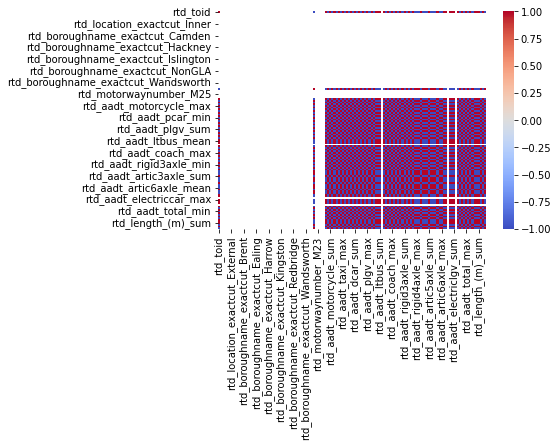

In [22]:
# Generate correlation heatmap
data_new_heat = data_new.iloc[0:2].corr()
sns.heatmap(data_new_heat,cmap='coolwarm')